# "[Colab] 타이타닉 데이터 분석"

- toc:true
- branch: master
- badges: true
- author: shw9807
- categories: [데이콘]

# 타이타닉 데이터 분석

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (6,127 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [3]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as npn
import pandas as pd
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [4]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/타이타닉/타이타닉.zip" -d "/content/drive/MyDrive/Colab Notebooks/타이타닉"

In [5]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/타이타닉/submission.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerID : 탑승객 고유 아이디  
Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)  
Pclass : 등실의 등급  
Name : 이름  
Sex : 성별  
Age : 나이  
Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수  
Parch : 함께 탐승한 부모, 자식의 수  
Ticket :티켓 번호  
Fare : 티켓의 요금  
Cabin : 객실번호  
Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)


일단 객실 등급과 성별, 나이, 티켓요금, 탑승한 항구 이름 정도가 영향이 있지 않았을까 싶다.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


객실번호와 나이를 제외한 변수들은 결측치를 가지지 않음을 확인할 수 있다.

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.loc[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
train.loc[(train['Age'].isna()) & (train['SibSp'] == 0 ) & (train['Parch'] == 0)] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [11]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


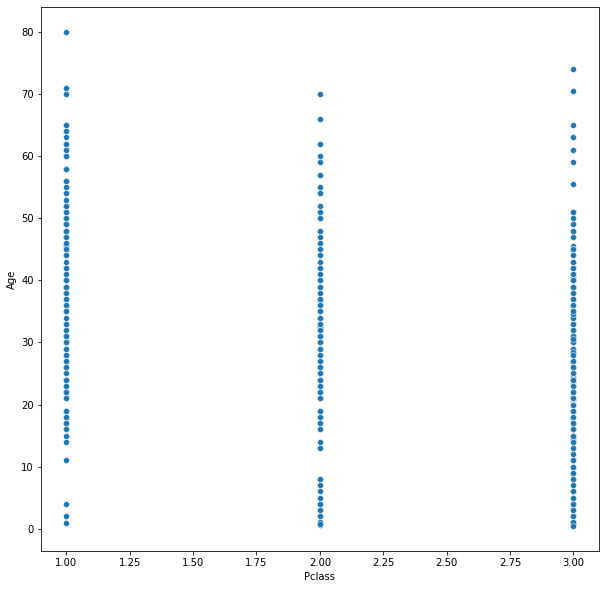

In [12]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='Pclass', y = 'Age')

## 결측치 처리

객실등급에 따라서 나이의 평균에 차이가 있는 것으로 보인다.  
아무래도 비싼 객실일수록 평균 나이대가 높아지는 경향이 있는 것으로 보인다.  
나이의 결측치들을 객실등급별로 평균값으로 채워주면 될 것 같다.

In [13]:
meanage = train.groupby('Pclass')['Age'].mean()

In [14]:
train.loc[(train['Age'].isna()) & (train['Pclass'] == 1), 'Age'] = meanage[1]
train.loc[(train['Age'].isna()) & (train['Pclass'] == 2),'Age'] = meanage[2]
train.loc[(train['Age'].isna()) & (train['Pclass'] == 3),'Age'] = meanage[3]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin은 결측치도 많고 별로 의미가 없을까 싶다. 변수 자체를 없애는 것이 나아보인다.
Embarked는 결측치가 몇 개 존재하지 않는다. 가장 자주 나온 변수로 채워주어도 괜찮을 것으로 보인다.

In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S 가 가장 많이 나타나므로 결측치는 S로 채워주도록 하자.

In [23]:
train['Embarked'].fillna(value = 'S', inplace = True)

In [24]:
train['Embarked'].isna().sum()

0

테스트 데이터에도 똑같이 적용해준다.

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test.loc[(test['Age'].isna()) & (test['Pclass'] == 1), 'Age'] = meanage[1]
test.loc[(test['Age'].isna()) & (test['Pclass'] == 2),'Age'] = meanage[2]
test.loc[(test['Age'].isna()) & (test['Pclass'] == 3),'Age'] = meanage[3]

In [34]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

성별이 'male'과 'female'로 설정되어 있는데 0과 1의 값을 가지는 변수로 변환해주자

In [35]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [36]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

## 데이터 시각화

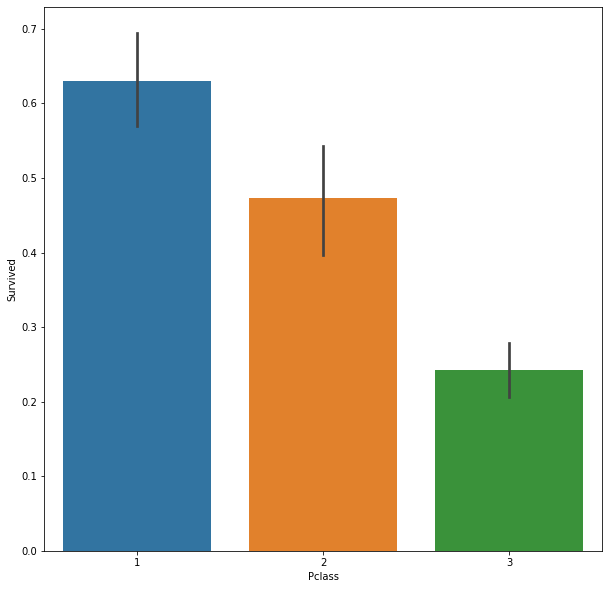

In [15]:
plt.figure(figsize=[10,10])
sns.barplot(data=train, x='Pclass', y = 'Survived')

확실히 객실의 등급이 높을수록 생존할 확률이 높아지는것을 확인할 수 있다.

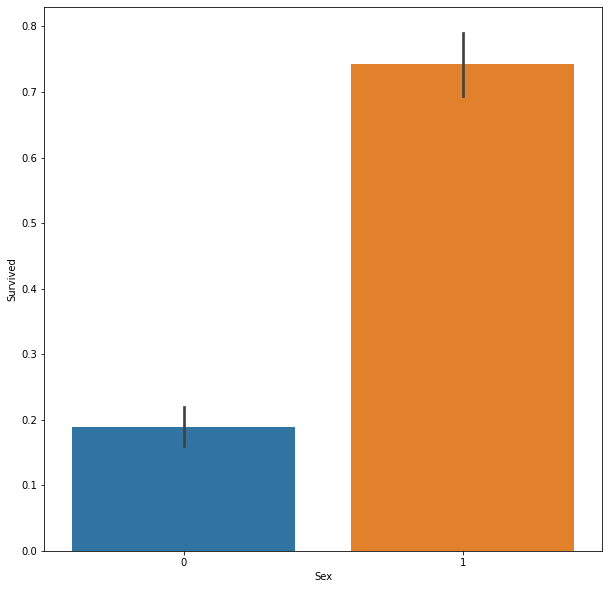

In [37]:
plt.figure(figsize=[10,10])
sns.barplot(data=train, x='Sex', y = 'Survived')

여자가 남자에 비해서 압도적으로 생존확률이 높은 것을 확인할 수 있다.

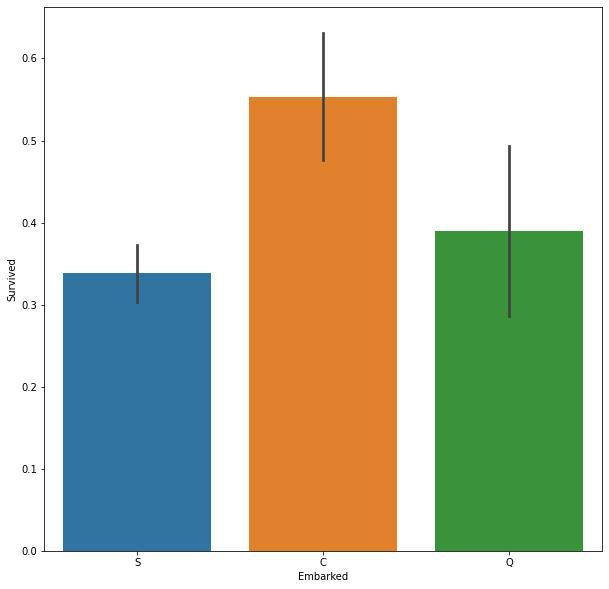

In [38]:
plt.figure(figsize=[10,10])
sns.barplot(data=train, x='Embarked', y = 'Survived')

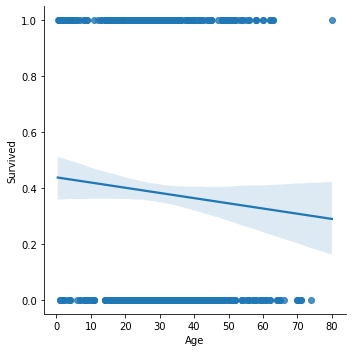

In [18]:
sns.lmplot(data=train, x='Age', y = 'Survived')

나이별로 생존률에 차이가 있는지를 어떻게 확인해보려고 했는데 잘 안된다....  
큰차이는 없다..? 나이가 많아질수록 생존확률이 낮아진다? 정도로 볼 수 있을 것 같다.

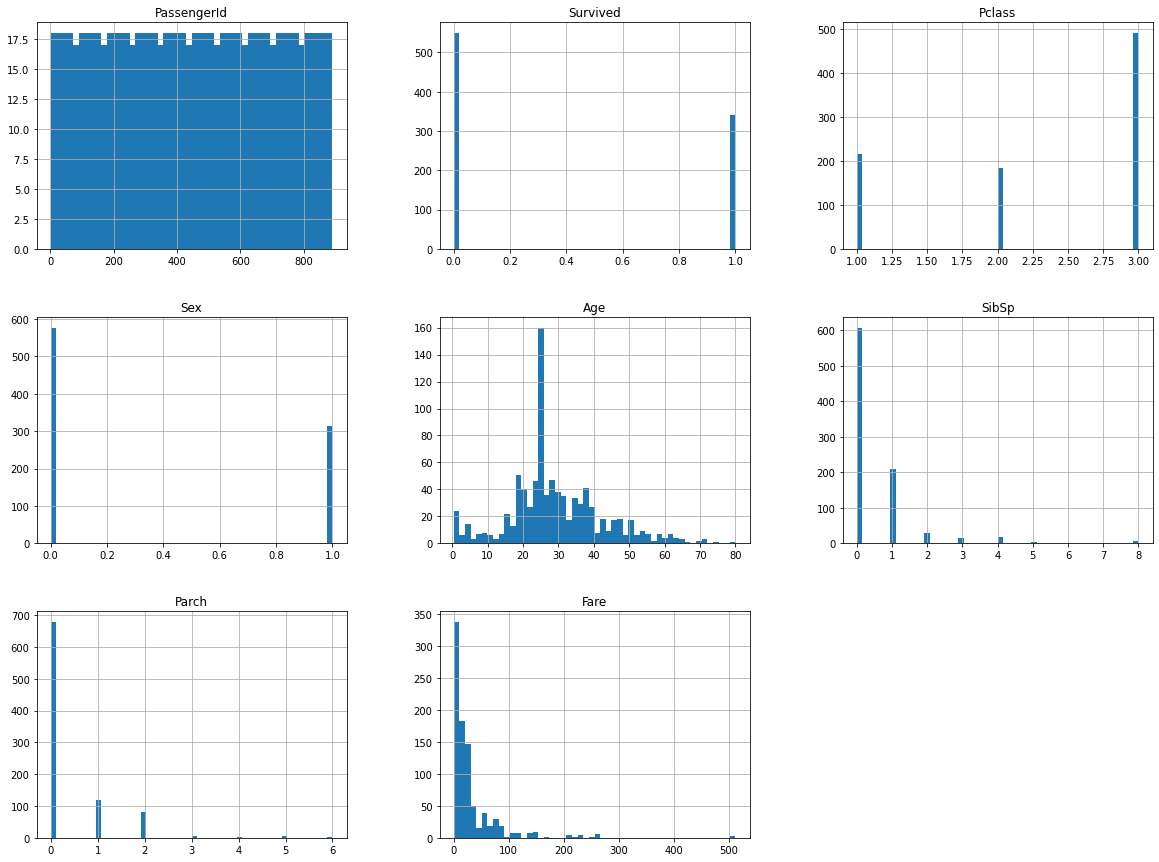

In [39]:
# 히스토그램
%matplotlib inline

train.hist(bins = 50, figsize = (20,15))
plt.show()

## 변수 선택 및 모델 구축

### sklearn.linear_model.LogisticRegression()

로지스틱 함수를 통해 0과 1사이의 값을 산출하여, 탑승객의 생존 여부를 파악해봅시다.

In [40]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
submission['Survived'] = y_pred

In [45]:
submission.to_csv('lr_model_Pclass_Age.csv', index = False)

### sklearn.tree.DecisionTreeClassifier()

특징변수들로부터 타깃변수를 맞추기 위해 경우를 쪼개나가는 알고리즘입니다.
(예) 과일이 사과, 딸기, 포도 중 무엇인지 맞추려합니다
- 주어진 특징은 과일 1개의 가로최대길이, 세로최대길이, 과일의색상이라고 합시다
- 사과를 맞추기 위해서 10 ~ 13cm의 가로, 세로 최대길이와 빨간색의 과일을 탐색하게 되겠죠
- 위의 '길이가 10 ~ 13cm인가? 아닌가?', '색깔이 빨간색인가? 아닌가?'의 기준이 경우를 쪼개나가는 기준이 됩니다.

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [47]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
submission['Survived'] = dt_model.predict(X_test)

In [49]:
submission.to_csv('dt_model.csv', index = False)

## 모델 학습 및 검증

In [50]:
submission['Survived'] = model.predict_proba(X_test)[:,1]

In [51]:
submission.to_csv('lr_proba.csv', index = False)

In [52]:
submission['Survived'] = dt_model.predict_proba(X_test)[:,1]

In [53]:
submission.to_csv('dt_proba.csv', index = False)

In [54]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [55]:
dt_model_new = DecisionTreeClassifier(min_samples_split=10)

In [56]:
dt_model_new.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [57]:
submission['Survived'] = dt_model_new.predict_proba(X_test)[:, 1]

In [58]:
submission.to_csv('dt_min_samples_10_proba.csv', index = False)

In [59]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.00000,0,0,111369,30.0000,C148,C


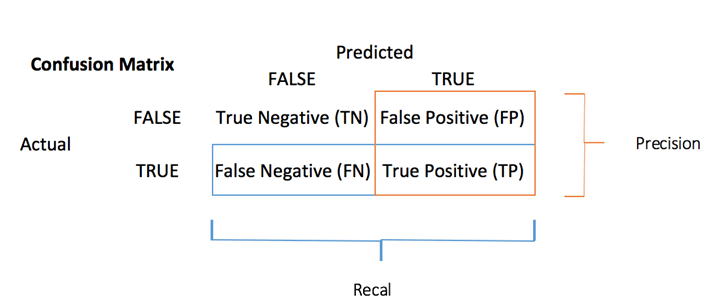

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [61]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [63]:
y_true = y_train.values

In [64]:
cf_matrix = confusion_matrix(y_true, y_pred)

In [65]:
cf_matrix

array([[466,  83],
       [183, 159]])

In [66]:
accuracy_score(y_true, y_pred)

0.7014590347923682

In [67]:
(cf_matrix[0,0] + cf_matrix[1,1]) / 891

0.7014590347923682

In [68]:
precision_score(y_true, y_pred)

0.6570247933884298

In [69]:
(cf_matrix[1,1]) / (83 + 160)

0.654320987654321

In [73]:
recall_score(y_true, y_pred)

0.4649122807017544

In [71]:
(cf_matrix[1,1]) / (182 + 160)

0.4649122807017544

In [72]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       549
           1       0.66      0.46      0.54       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.69      0.70      0.69       891



- 데이콘 채점 기준은 auc 라는 지표를 사용합니다.
- auc값을 측정하기 위해서는, 예측을 확률값으로 해주어야 합니다.
- 그 중에서 1에 속할 확률을 선택해주어야 합니다.

In [74]:
roc_auc_score(y_true, y_pred)

0.6568641549228261

## 결과 및 결언

In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [76]:
model_10 = DecisionTreeClassifier(min_samples_split=10)
model_20 = DecisionTreeClassifier(min_samples_split=20)
model_30 = DecisionTreeClassifier(min_samples_split=30)

In [77]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [78]:
score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [79]:
score_10

[0.666528811690102,
 0.6923701298701299,
 0.6616221174004193,
 0.58994708994709,
 0.7008647798742138]

In [80]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [81]:
score_20

[0.6767300799558864,
 0.696766774891775,
 0.6660770440251572,
 0.608531746031746,
 0.7118055555555556]

In [82]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [83]:
score_30

[0.6944444444444444,
 0.7076569264069265,
 0.6582154088050315,
 0.6217592592592592,
 0.7237945492662475]

In [85]:
import numpy as np

In [86]:
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.662266585756391, 0.671982240092024, 0.6811741176363818)

추가로 성별까지 변수에 추가하여 점수를 확인해보자.

In [89]:
X_train = train[['Pclass', 'Age', 'Sex']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age', 'Sex']]

In [93]:
score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [94]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [90]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [95]:
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.8173547973745784, 0.8224093714579868, 0.8311338310733472)

In [98]:
from sklearn import tree

[Text(0.5275735294117647, 0.9615384615384616, 'X[2] <= 0.5\ngini = 0.471\nsamples = 713\nvalue = [443, 270]'),
 Text(0.2610294117647059, 0.8846153846153846, 'X[0] <= 1.5\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(0.11764705882352941, 0.8076923076923077, 'X[1] <= 36.5\ngini = 0.468\nsamples = 102\nvalue = [64, 38]'),
 Text(0.058823529411764705, 0.7307692307692307, 'X[1] <= 33.5\ngini = 0.484\nsamples = 34\nvalue = [14, 20]'),
 Text(0.029411764705882353, 0.6538461538461539, 'gini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.08823529411764706, 0.6538461538461539, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.17647058823529413, 0.7307692307692307, 'X[1] <= 60.5\ngini = 0.389\nsamples = 68\nvalue = [50, 18]'),
 Text(0.14705882352941177, 0.6538461538461539, 'X[1] <= 47.5\ngini = 0.42\nsamples = 60\nvalue = [42, 18]'),
 Text(0.11764705882352941, 0.5769230769230769, 'X[1] <= 45.25\ngini = 0.381\nsamples = 39\nvalue = [29, 10]'),
 Text(0.08823529411764706, 0.5, 'X[1] 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


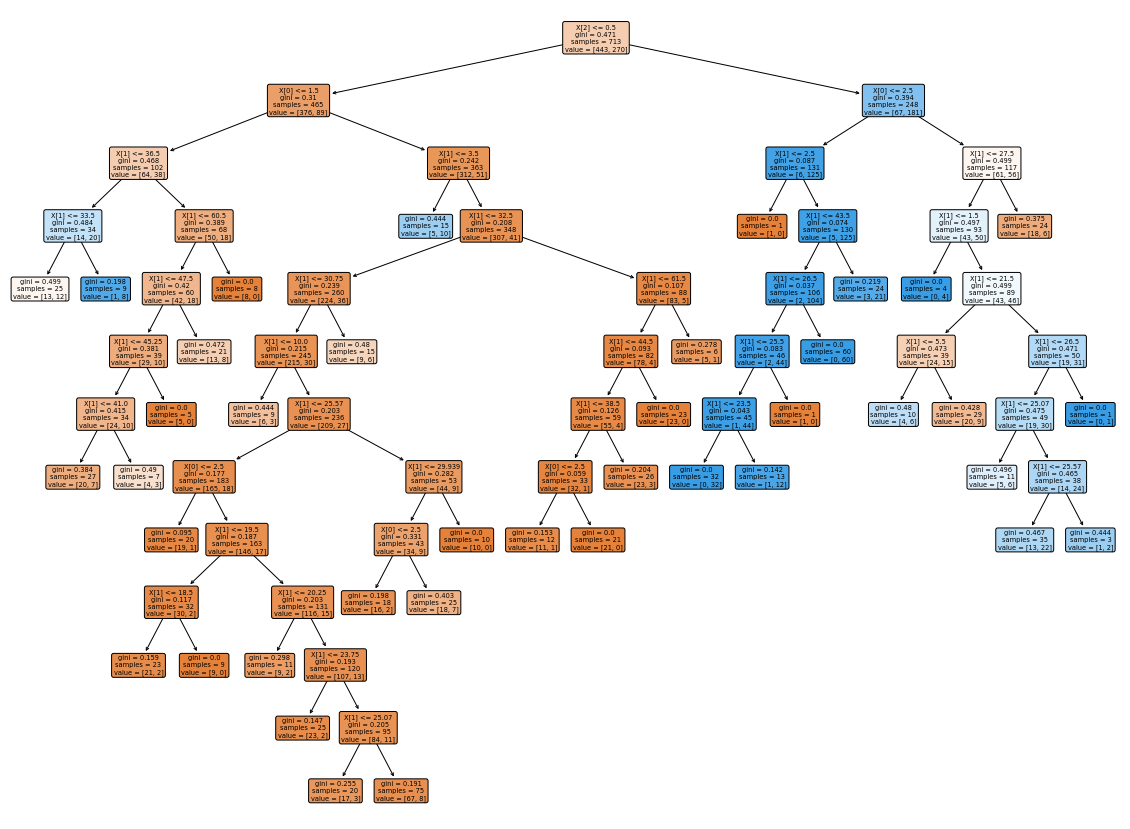

In [99]:
plt.figure( figsize=(20,15) )
tree.plot_tree(model_30, 
               impurity=True, filled=True,
               rounded=True)

In [104]:
model_30 = DecisionTreeClassifier(min_samples_split=30)
model_30.fit(X_train, y_train)
Y_pred = model_30.predict(X_test)
model_30.score(X_train, y_train)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

In [107]:
import os
print(os.getcwd())

/content
